<a href="https://colab.research.google.com/github/MuhammadHasbiAshshiddieqy/pythonDS-COVID-19-/blob/master/CoronaVirusCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pada program kali ini, data akan diambil dengan melalui dua cara. Cara pertama adalah dengan menggunakan API coronavirus dan cara kedua adalah pengambilan data csv terbaru melalui https://github.com/CSSEGISandData/COVID-19.**

In [0]:
!pip install coronavirus

     |████████████████████████████████| 1.2MB 2.8MB/s 
     |████████████████████████████████| 256kB 20.1MB/s 
     |████████████████████████████████| 153kB 19.7MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=d9b6ec0599a41cdbb1ef2f08bdf164f8cfaa7824dda60ba1f9e8d26bf82d0f3b
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [0]:
!apt-get install libgeos
!apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (177 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     |████████████████████████████████| 133.1MB 54kB/s 
     |████████████████████████████████| 10.4MB 2.7MB/s 
     |████████████████████████████████| 225kB 55.6MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756014 sha256=a68327f7e04aca2df27372b5fcbdcfa1de2a37f78c27e4f181a2c661fe04a94e
  Stored in directory: /tmp/pip-ephem-wheel-cache-labsj9v2/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=277cf20fc3f70f0575408ed3c32b6c13c375c06f7ae1c8afe366a70ba9cd7581
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


In [0]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702110 sha256=08d1a70a1765c92a50416671f3d07c0e7734ff7627f751d9394b592eb543a39a
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta as td

%matplotlib inline

import asyncio
import aiohttp

from coronavirus import get_cases

In [0]:
async def getData():
  session = aiohttp.ClientSession()
  cases = await get_cases(session)
  country,confirmed,deaths,recovered,latitude,longitude = [],[],[],[],[],[]
  for case in cases:
    #print(f"Cases in {case.country}: {case.confirmed}")
    #attr of case = id, country, confirmed, deaths, recovered, latitude, longitude, updated
    country.append(case.country)
    confirmed.append(case.confirmed)
    deaths.append(case.deaths)
    recovered.append(case.recovered)
    latitude.append(case.latitude)
    longitude.append(case.longitude)
    await session.close()
  df = pd.DataFrame({"Country":country,"Confirmed":confirmed,"Deaths":deaths,"Recovered":recovered,"Latitude":latitude,"Longitude":longitude})
  return df

In [0]:
  loop = asyncio.get_event_loop()
  dfCovid = loop.run_until_complete(getData())
  dfCovid.head()

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Canada,1328,19,10,60.0010,-95.0010
1,Maldives,13,0,0,3.2028,73.2207
2,Lithuania,99,1,1,55.1694,23.8813
3,Cambodia,53,0,1,12.5657,104.9910
4,Ethiopia,9,0,4,9.1450,40.4897


In [0]:
dfCovid["Death Rate(%)"] = round((dfCovid["Deaths"]/dfCovid["Confirmed"])*100,2)
dfCovid["Not Recovered"] = dfCovid["Confirmed"] - dfCovid["Recovered"] - dfCovid["Deaths"]
dfCovid.head(3)

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude,Death Rate(%),Not Recovered
0,Canada,1328,19,10,60.0010,-95.0010,1.43,1299
1,Maldives,13,0,0,3.2028,73.2207,0.00,13
2,Lithuania,99,1,1,55.1694,23.8813,1.01,97


In [0]:
df_sort_confirmed = dfCovid.sort_values(["Confirmed"],ascending=False)
df_sort_confirmed = df_sort_confirmed.reset_index(drop=True)
df_sort_confirmed.head(3)

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude,Death Rate(%),Not Recovered
0,China,81393,3265,72361,30.5928,114.3055,4.01,5767
1,Italy,53578,4825,6072,41.8719,12.5674,9.01,42681
2,US,26747,340,176,40.0000,-100.0000,1.27,26231


In [0]:
df_sort_deathrate = dfCovid.sort_values(["Death Rate(%)"],ascending=False)
df_sort_deathrate = df_sort_deathrate.reset_index(drop=True)
df_sort_deathrate.head(3)

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude,Death Rate(%),Not Recovered
0,Sudan,2,1,0,12.8628,30.2176,50.00,1
1,Gabon,5,1,0,-0.8037,11.6094,20.00,4
2,Guyana,7,1,0,4.8604,-58.9302,14.29,6


**Melakukan plotting terhadap persebaran COVID-19 per negara (Data API coronavirus)**

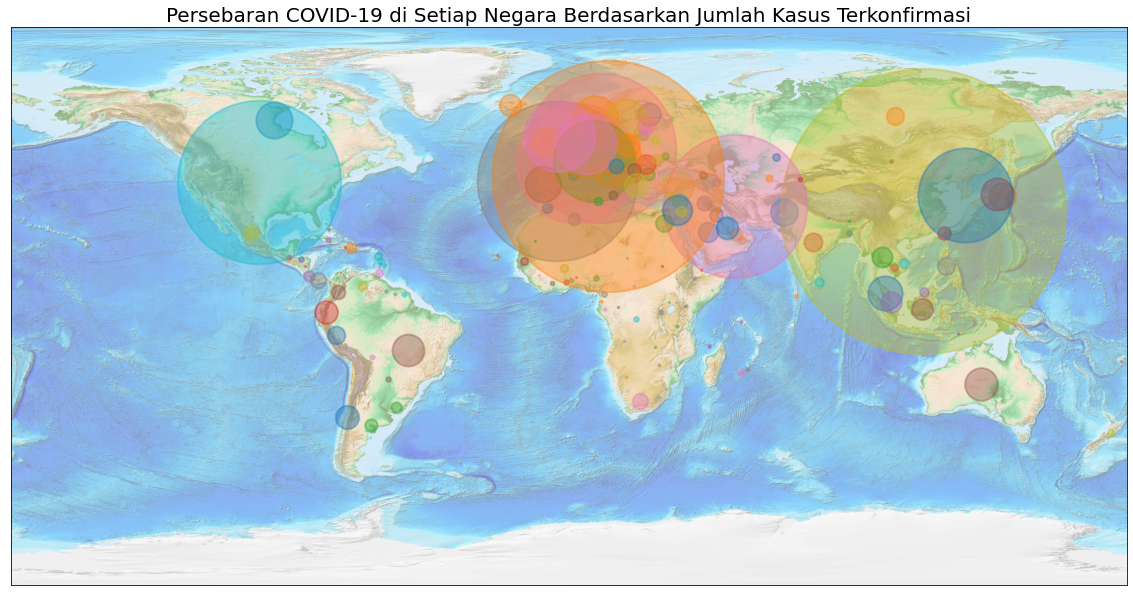

In [0]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.etopo(scale=0.5, alpha=0.5)
plt.title("Persebaran COVID-19 di Setiap Negara Berdasarkan Jumlah Kasus Terkonfirmasi", fontsize='20')
for i in range(int(dfCovid.shape[0])):
  x, y = m(dfCovid.iloc[i:i+1]["Longitude"].values[0], dfCovid.iloc[i:i+1,:]["Latitude"])
  plt.scatter(x, y, s=dfCovid.iloc[i:i+1,:]["Confirmed"].values[0], alpha=0.4, linewidth=2)
  #plt.plot(x, y, 'ok', markersize=2)
  #plt.text(x, y, dfCovid.iloc[i:i+1,:]["Country"].values[0], fontsize=7);

**Melakukan plotting terhadap penderita COVID-19 pada sepuluh negara dengan kasus terkonfirmasi terbanyak**

In [0]:
top_ten_confirmed = df_sort_confirmed.iloc[0:10,:].copy()
top_ten_confirmed = top_ten_confirmed.set_index("Country")
top_ten_confirmed.head() 

,Confirmed,Deaths,Recovered,Latitude,Longitude,Death Rate(%),Not Recovered
Country,,,,,,,
China,81393,3265,72361,30.5928,114.3055,4.01,5767
Italy,53578,4825,6072,41.8719,12.5674,9.01,42681
US,26747,340,176,40.0000,-100.0000,1.27,26231
Spain,25496,1381,2125,40.4637,-3.7492,5.42,21990
Germany,22364,84,239,51.1657,10.4515,0.38,22041


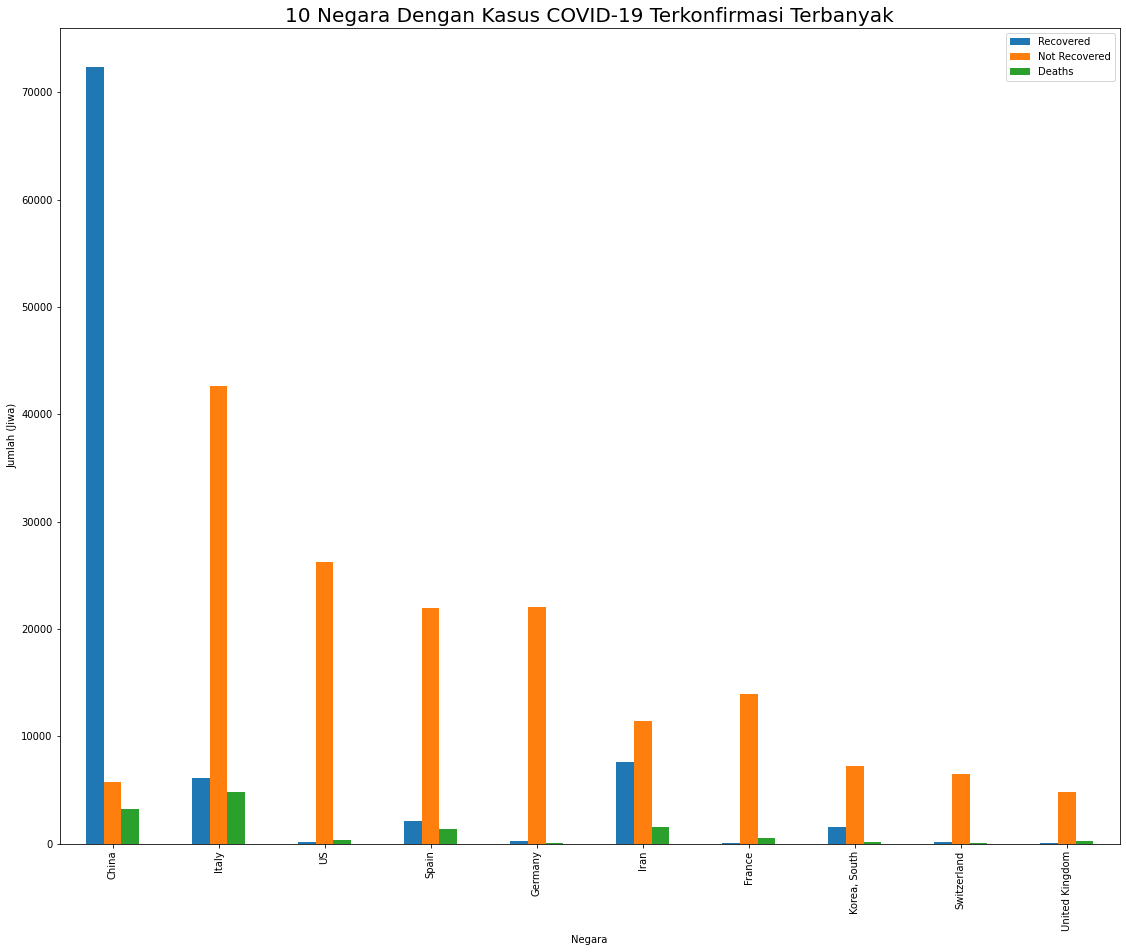

In [0]:
top_ten_confirmed[["Recovered","Not Recovered","Deaths"]].plot.bar(stacked=False)
plt.gcf().set_size_inches(19, 15)
plt.title("10 Negara Dengan Kasus COVID-19 Terkonfirmasi Terbanyak", fontsize = 20)
plt.xlabel("Negara")
plt.ylabel("Jumlah (Jiwa)")
plt.show()

**Melakukan plotting terhadap 10 negara dengan tingkat kematian tertinggi (kasus terkonfirmasi > 1000)**

In [0]:
top_ten_deathrate_thousand = dfCovid[dfCovid["Confirmed"]>1000]
top_ten_deathrate_thousand = top_ten_deathrate_thousand.sort_values(["Death Rate(%)"], ascending=False)
top_ten_deathrate_thousand = top_ten_deathrate_thousand.iloc[0:10,:].copy()
top_ten_deathrate_thousand = top_ten_deathrate_thousand.set_index("Country")
top_ten_deathrate_thousand.head() 

,Confirmed,Deaths,Recovered,Latitude,Longitude,Death Rate(%),Not Recovered
Country,,,,,,,
Italy,53578,4825,6072,41.8719,12.5674,9.01,42681
Iran,20610,1556,7635,32.4279,53.6880,7.55,11419
Spain,25496,1381,2125,40.4637,-3.7492,5.42,21990
United Kingdom,5067,234,67,55.0000,-3.0000,4.62,4766
China,81393,3265,72361,30.5928,114.3055,4.01,5767


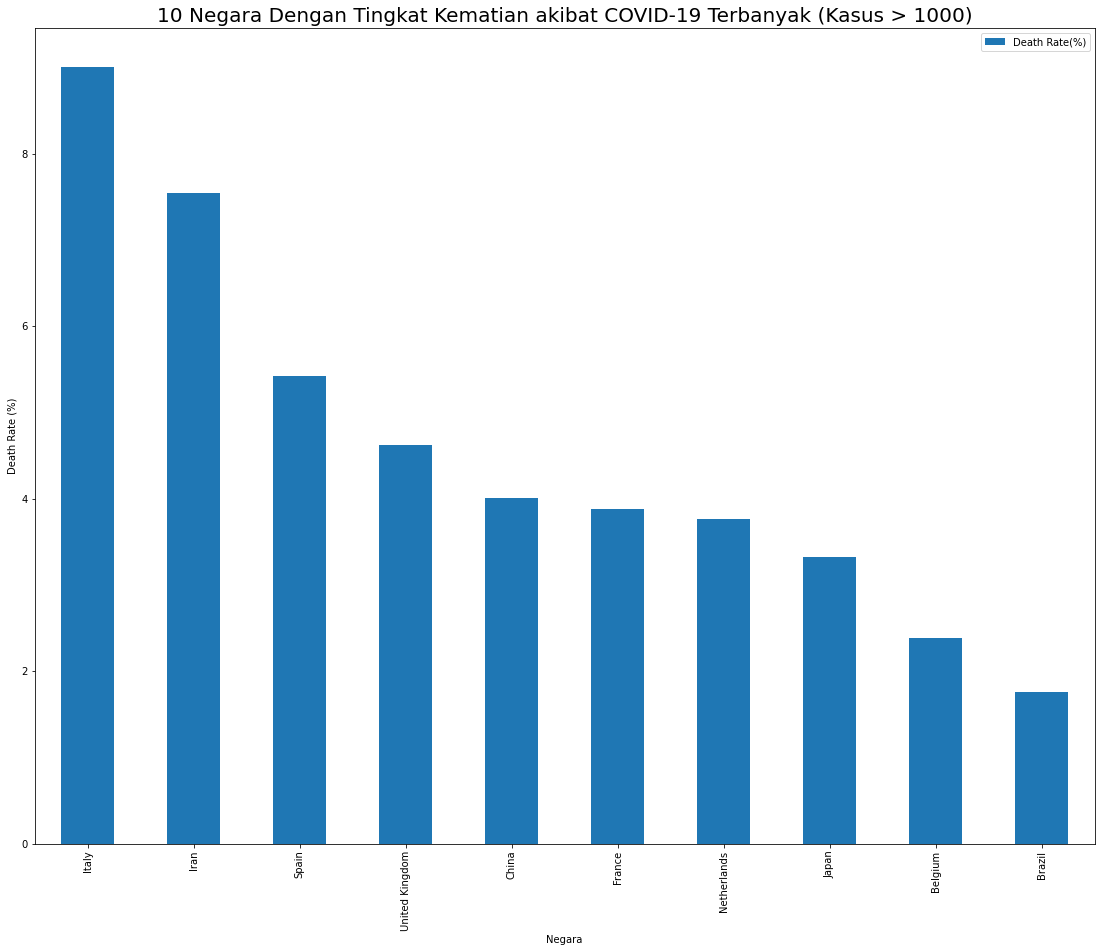

In [0]:
top_ten_deathrate_thousand[["Death Rate(%)"]].plot.bar()
plt.gcf().set_size_inches(19, 15)
plt.title("10 Negara Dengan Tingkat Kematian akibat COVID-19 Terbanyak (Kasus > 1000)", fontsize = 20)
plt.xlabel("Negara")
plt.ylabel("Death Rate (%)")
plt.show()

**Melakukan plotting terhadap persebaran COVID-19 per provinsi (Data https://github.com/CSSEGISandData/COVID-19)**

In [0]:
date = str(dt.strftime(dt.now() - td(1), '%m-%d-%Y'))

In [0]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date+".csv"

In [0]:
CovDetail = pd.read_csv(url)

In [0]:
CovDetail.head(3)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492


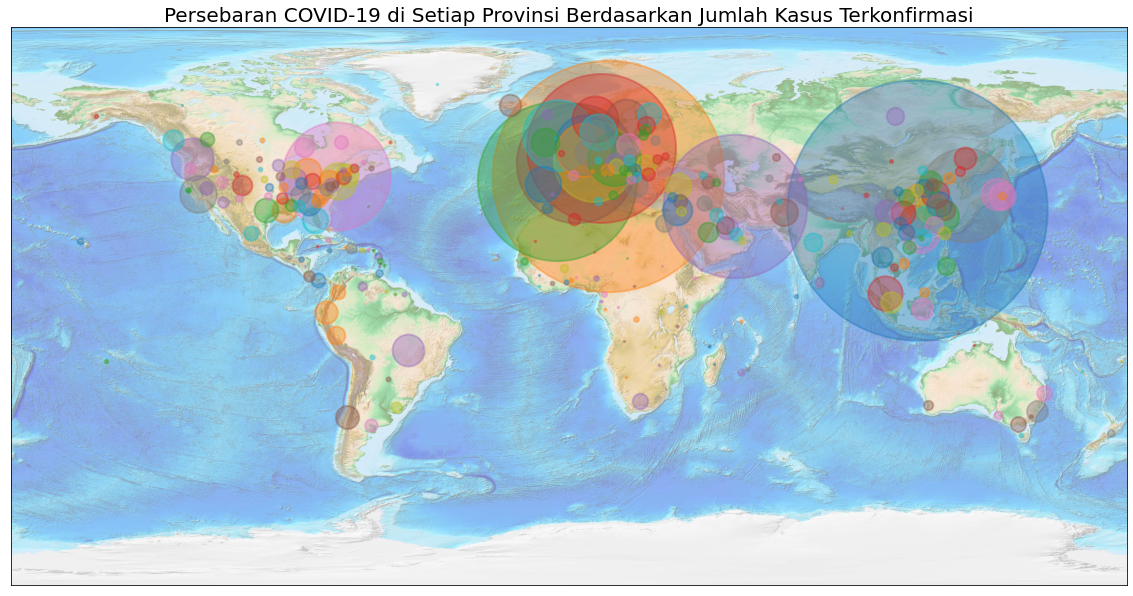

In [0]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.etopo(scale=0.5, alpha=0.5)
plt.title("Persebaran COVID-19 di Setiap Provinsi Berdasarkan Jumlah Kasus Terkonfirmasi", fontsize='20')
for i in range(int(CovDetail.shape[0])):
  x, y = m(CovDetail.iloc[i:i+1]["Longitude"].values[0], CovDetail.iloc[i:i+1,:]["Latitude"])
  plt.scatter(x, y, s=CovDetail.iloc[i:i+1,:]["Confirmed"].values[0], alpha=0.4, linewidth=2)
  #plt.plot(x, y, 'ok', markersize=2)
  #plt.text(x, y, CovDetail.iloc[i:i+1,:]["Country/Region"].values[0], fontsize=7);